In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
train_data=pd.read_csv('Titanic_train.csv')

In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_data.shape

(891, 12)

In [8]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# drop 'Cabin' feature as most of the values are missing
train_data=train_data.drop('Cabin',axis=1)

In [113]:
print(train_data.shape,'\n')
print(train_data.columns)

(891, 11) 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [15]:
## getting numeric columns
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [8]:
# separating numeric columns
df_num=train_data[['Age','SibSp','Parch','Fare']]
df_num.columns

Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [9]:
# separating  categorical columns
df_cat=train_data[['Survived','Pclass','Sex','Embarked']]
# dropped ticket variable as it doesn't have anything to do with survival


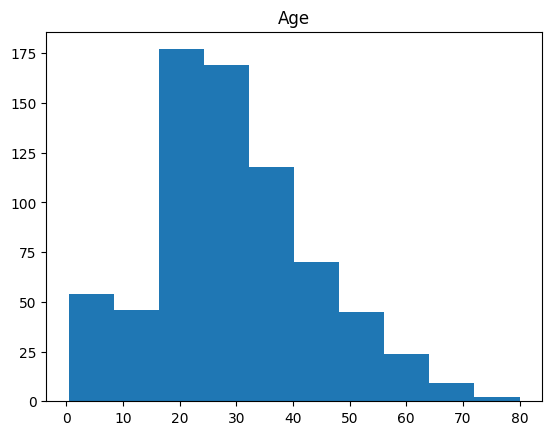

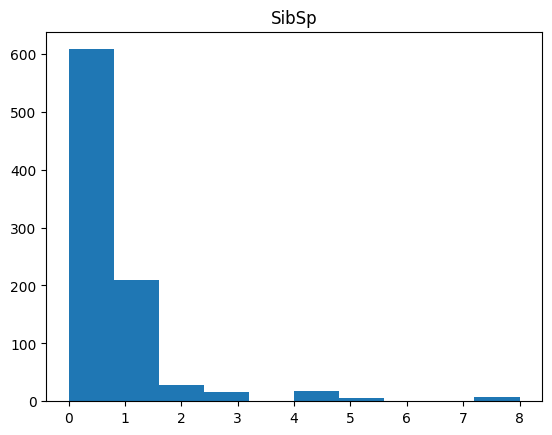

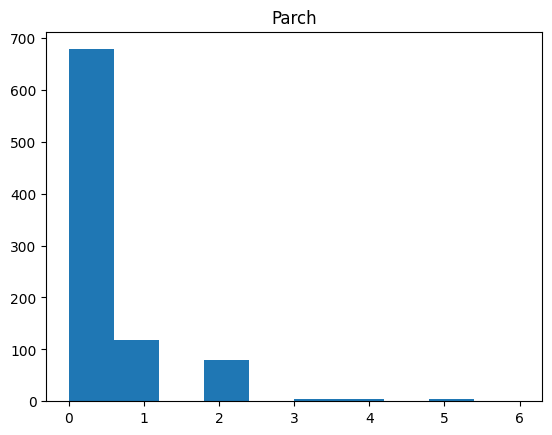

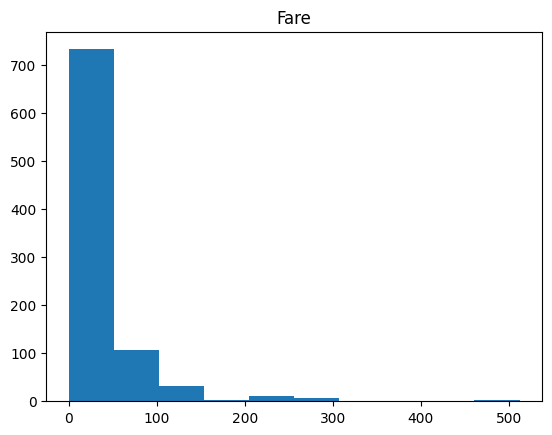

In [116]:
# bbarplots for numerical columns
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

    here other than 'Age' aother variables aren't normally distributed

In [117]:
print(df_num.corr())

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

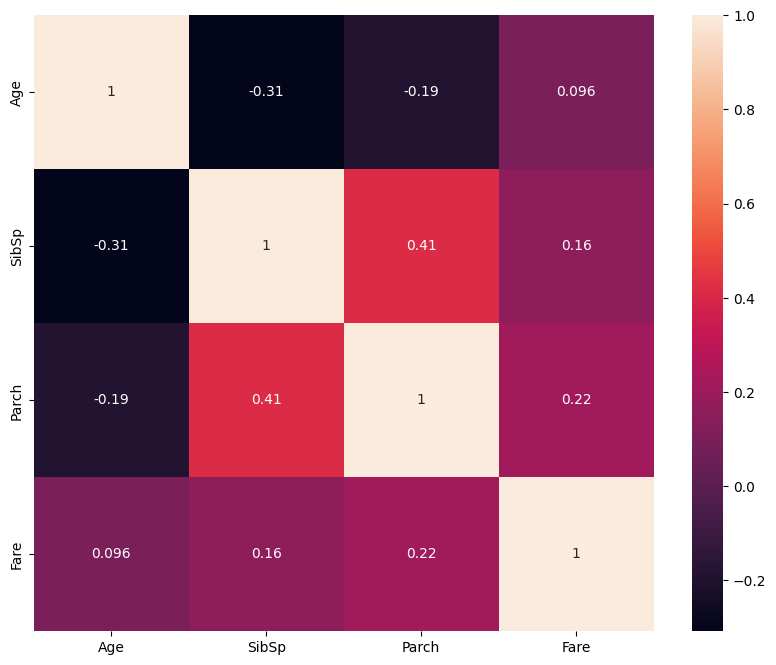

In [53]:
plt.figure(figsize=(10,8))
sns.heatmap(df_num.corr(),annot=True)

 SibSp and Parch kinda having some positive correlation

In [25]:
## survival rate across age, sibsp, parch and fare
pd.pivot_table(train_data,index='Survived',values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


feels like younger people survived , 
people who got higher fare ticket survived


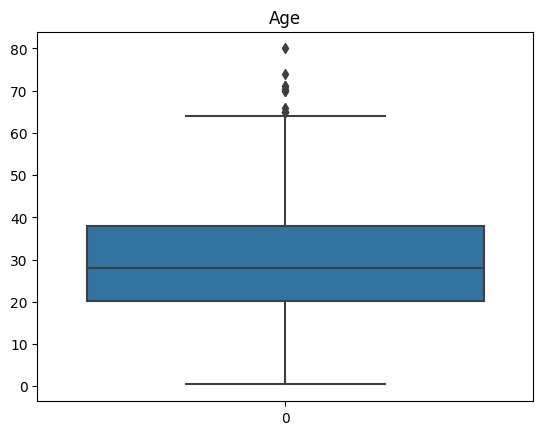

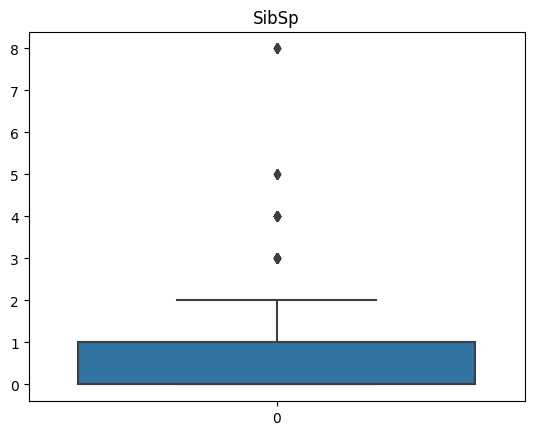

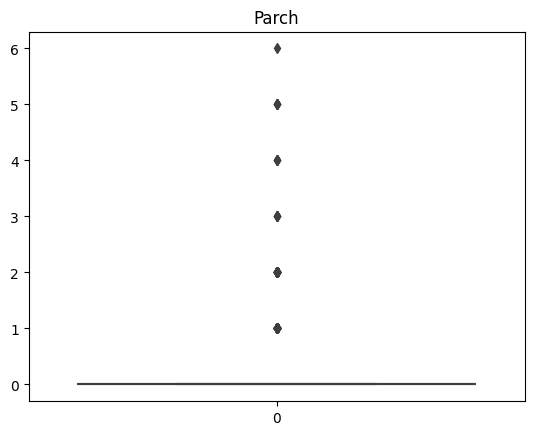

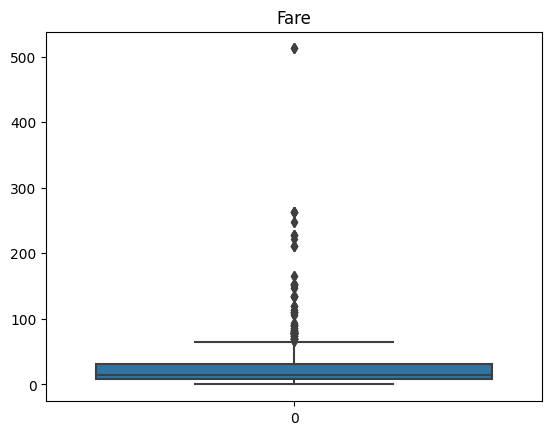

In [50]:
for i in df_num:
    sns.boxplot(train_data[i]).set_title(i)
    plt.show()

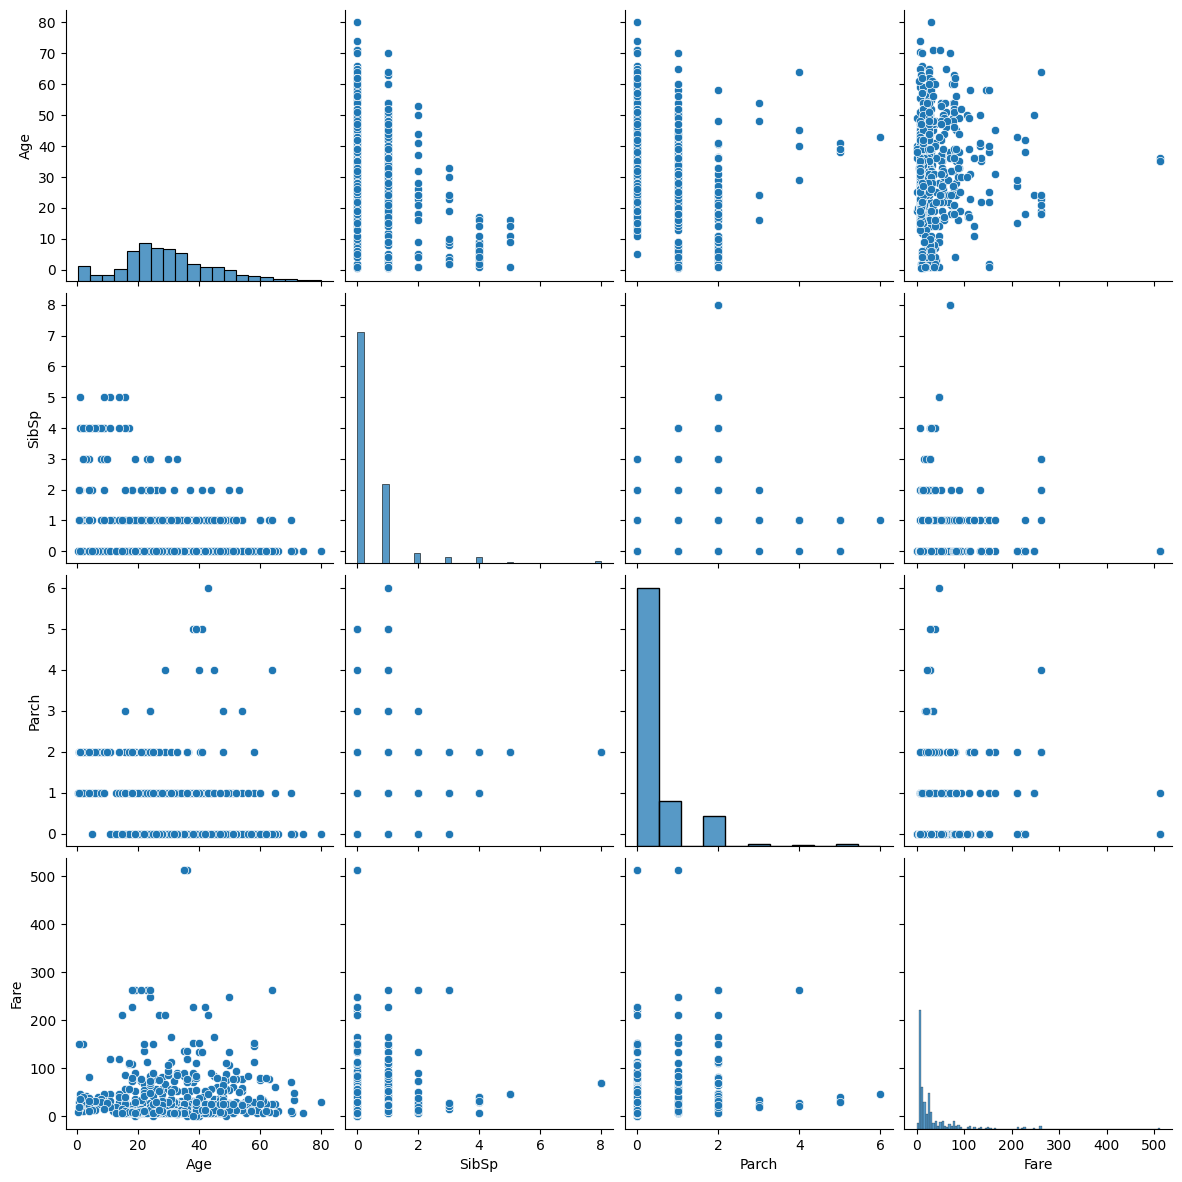

In [51]:
   # plt.figure(figsize=(10, 10))

sns.pairplot(df_num,size=3)

In [56]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [6]:
it_impute=IterativeImputer(random_state=0)

In [10]:
it_imputer=it_impute.fit_transform(df_num)

In [11]:
age=pd.DataFrame(it_imputer)
age

,0,1,2,3
0,22.00000,1.0,0.0,7.2500
1,38.00000,1.0,0.0,71.2833
2,26.00000,0.0,0.0,7.9250
3,35.00000,1.0,0.0,53.1000
4,35.00000,0.0,0.0,8.0500
...,...,...,...,...
886,27.00000,0.0,0.0,13.0000
887,19.00000,0.0,0.0,30.0000
888,24.17135,1.0,2.0,23.4500
889,26.00000,0.0,0.0,30.0000


In [12]:
train_data['Age']=age[0]

In [92]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [13]:
train_data['Embarked']=train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [94]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [123]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.17135,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [15]:
train_data=pd.get_dummies(train_data, columns=['Sex'],drop_first=True)

In [16]:
train_data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.00000,1,0,A/5 21171,7.2500,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.00000,1,0,PC 17599,71.2833,C,False
2,3,1,3,"Heikkinen, Miss. Laina",26.00000,0,0,STON/O2. 3101282,7.9250,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00000,1,0,113803,53.1000,S,False
4,5,0,3,"Allen, Mr. William Henry",35.00000,0,0,373450,8.0500,S,True
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.00000,0,0,211536,13.0000,S,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.00000,0,0,112053,30.0000,S,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",24.17135,1,2,W./C. 6607,23.4500,S,False
889,890,1,1,"Behr, Mr. Karl Howell",26.00000,0,0,111369,30.0000,C,True


In [17]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [18]:
lab_enc=LabelEncoder()
std_scaler=StandardScaler()

In [154]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [19]:
train_data['Embarked']= lab_enc.fit_transform(train_data[['Embarked']])

In [20]:
train_data.set_index('PassengerId')

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.00000,1,0,A/5 21171,7.2500,2,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.00000,1,0,PC 17599,71.2833,0,False
3,1,3,"Heikkinen, Miss. Laina",26.00000,0,0,STON/O2. 3101282,7.9250,2,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00000,1,0,113803,53.1000,2,False
5,0,3,"Allen, Mr. William Henry",35.00000,0,0,373450,8.0500,2,True
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",27.00000,0,0,211536,13.0000,2,True
888,1,1,"Graham, Miss. Margaret Edith",19.00000,0,0,112053,30.0000,2,False
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",24.17135,1,2,W./C. 6607,23.4500,2,False


In [21]:
train_data['Fare']= std_scaler.fit_transform(train_data[['Fare']])
train_data['Age']= std_scaler.fit_transform(train_data[['Age']])


In [163]:
train_data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",-0.569624,1,0,A/5 21171,-0.502445,2,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.623308,1,0,PC 17599,0.786845,0,False
2,3,1,3,"Heikkinen, Miss. Laina",-0.271391,0,0,STON/O2. 3101282,-0.488854,2,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.399633,1,0,113803,0.420730,2,False
4,5,0,3,"Allen, Mr. William Henry",0.399633,0,0,373450,-0.486337,2,True
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",-0.196833,0,0,211536,-0.386671,2,True
887,888,1,1,"Graham, Miss. Margaret Edith",-0.793298,0,0,112053,-0.044381,2,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",-0.407732,1,2,W./C. 6607,-0.176263,2,False
889,890,1,1,"Behr, Mr. Karl Howell",-0.271391,0,0,111369,-0.044381,0,True


In [22]:
X = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
Y = train_data['Survived']

In [23]:
logreg_model = LogisticRegression()

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [25]:
logreg_model.fit(X_train, Y_train)

LogisticRegression()

In [26]:
y_pred = logreg_model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [28]:
accuracy_score(Y_test,y_pred)

0.8212290502793296

In [29]:
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86       117
           1       0.74      0.74      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



In [39]:
roc_auc=roc_auc_score(Y_test, y_pred)
roc_auc

0.8025916735594155

In [31]:
print("efficients")
pd.DataFrame(logreg_model.coef_[0],index=X.columns,columns=[' '])

efficients


,
Pclass,-0.994804
Age,-0.456760
SibSp,-0.473634
Parch,-0.114940
Fare,0.082389
Embarked,-0.319137
Sex_male,-2.616487


In [32]:
logreg_model.intercept_

array([4.17823848])

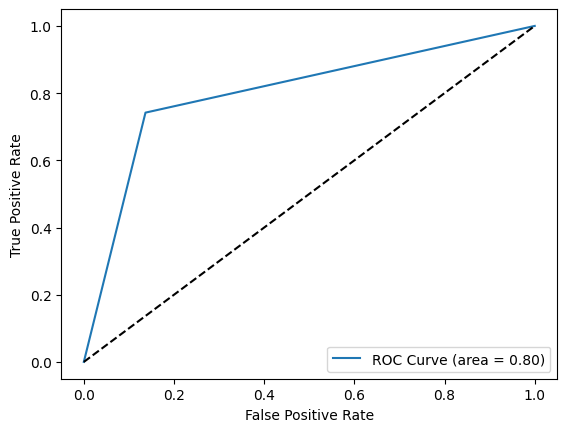

In [44]:
# ROC curve
fpr,tpr, thresholds = roc_curve(Y_test, y_pred)
plt.plot(fpr,tpr,label='ROC Curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")


In [45]:
file='log_model2.pkl'

In [46]:
import pickle

In [49]:
pickle.dump(logreg_model,open(file,'wb'))

Significance of features in predicting survival probability:
- Features with positive coefficients have a positive impact on survival probability.
- Features with negative coefficients have a negative impact on survival probability.

### Interview Questions:

1. What is the difference between precision and recall?


Precision, also known as positive predictive value, measures the accuracy of the positive predictions made by the model. It is calculated as the ratio of true positives (correctly predicted positive instances) to the sum of true positives and false positives (instances incorrectly predicted as positive).

 precision = ( true positives ) / ( true positives + false positives )

Recall, also known as sensitivity or true positive rate, measures the ability of the model to correctly identify all positive instances. It is calculated as the ratio of true positives to the sum of true positives and false negatives (instances incorrectly predicted as negative but are actually positive).

Recall = ( true positives ) / ( true positives + false negatives )

2. What is cross-validation, and why is it important in binary classification?


Cross-validation is a technique used to assess the performance of a predictive model by partitioning the dataset into subsets, training the model on a portion of the data, and evaluating it on the remaining data. This process is repeated multiple times, with different subsets used for training and testing in each iteration. The goal is to obtain a more reliable estimate of the model's performance, especially when the dataset is limited.


Cross-validation is a technique used to assess the performance of a predictive model by partitioning the dataset into subsets, training the model on a portion of the data, and evaluating it on the remaining data. This process is repeated multiple times, with different subsets used for training and testing in each iteration. The goal is to obtain a more reliable estimate of the model's performance, especially when the dataset is limited.

In binary classification, where the task is to classify instances into one of two classes, cross-validation is important for several reasons:

1. Robustness of Model Evaluation
2. Prevention of Overfitting
3. Optimization of Hyperparameters
4. Better Utilization of Data